## Data Analysis

In this first part of the project we will perform the analysis of translator assingment patterns. 

**Installation**  
Uncomment the library and execute the cell

**Install All Packages**  
If you want to install all packages used in this project, you can use the provided requirements.txt file:  

`pip install -r requirements.txt`


**Recreating the Environment**  
If you want to recreate our exact environment, you can use the provided environment.yml file:

`conda env create -f environment.yml`

This command will create a new conda environment named `environment`, if you need to change the name of the environment simply edit this name in the corresponding file (environment.yml).

In [1]:
## TODO complete instalation of the packages
# Installation of required packages
    
# By using pip
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

# By using conda
# !conda install -c conda-forge numpy -y
# !conda install -c conda-forge pandas -y
# !conda install -c conda-forge matplotlib -y
# !conda install -c conda-forge seaborn -y

# Check versions
# !pip show numpy
# !pip show pandas
# !pip show matplotlib
# !pip show seaborn

**Import libraries**

In [2]:
## TODO complete this with all libraries used
import os
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib import rcParams
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.projections.polar import PolarAxes
import matplotlib.cm as cm

from IPython.display import display

**Environmental Configurations**

In [35]:
plt.rcParams['font.family'] = 'Arial'
rcParams["font.size"] = 15             # Sets the font size for all text elements in plots
rcParams["legend.loc"] = "best"        # Automatically places the legend in the best position
rcParams["figure.figsize"] = (12, 7)   # Sets the default figure size to 12x7 inches

pd.set_option('display.max_columns', None)        # Muestra todas las columnas
pd.set_option('display.width', 0)                 # Ajuste automático al ancho disponible
pd.set_option('display.max_colwidth', None)       # Muestra contenido completo en columnas

**Import Data**

Data Directory

In [4]:
data_path = os.path.join("..", "Data")

In [5]:
schedules_df = pd.read_excel(os.path.join(data_path, "Schedules.xlsx"))
data_df = pd.read_excel(os.path.join(data_path, "Data.xlsx"))
clients_df = pd.read_excel(os.path.join(data_path, "Clients.xlsx"))
transl_cost_pairs_df = pd.read_excel(os.path.join(data_path, "TranslatorsCost+Pairs.xlsx"))

 **Data Overview**

First look at the data and some basic information

In [6]:
print("\nData Info:")
data_df.info()
data_df.describe()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554029 entries, 0 to 554028
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   PROJECT_ID                   554029 non-null  object        
 1   PM                           554029 non-null  object        
 2   TASK_ID                      554029 non-null  int64         
 3   START                        554029 non-null  object        
 4   END                          554029 non-null  datetime64[ns]
 5   TASK_TYPE                    554029 non-null  object        
 6   SOURCE_LANG                  554029 non-null  object        
 7   TARGET_LANG                  554029 non-null  object        
 8   TRANSLATOR                   554029 non-null  object        
 9   ASSIGNED                     554029 non-null  datetime64[ns]
 10  READY                        554029 non-null  datetime64[ns]
 11  WORKING       

,TASK_ID,END,ASSIGNED,READY,WORKING,DELIVERED,RECEIVED,CLOSE,HOURS,HOURLY_RATE,COST,QUALITY_EVALUATION
count,5.540290e+05,554029,554029,554029,554029,554029,554029,554029,554029.000000,554029.000000,554029.000000,554029.000000
mean,1.067535e+07,2018-03-22 11:23:06.568599808,2018-03-19 20:40:49.710924544,2018-03-20 09:01:30.532499456,2018-03-21 06:02:55.127392768,2018-03-22 02:34:53.842454016,2018-03-22 10:09:04.660346368,2018-03-22 12:53:49.115781120,2.342250,16.373515,37.883495,7.064479
min,1.004828e+07,2009-11-06 19:00:00,2010-01-04 09:35:57,2010-01-04 09:37:06,2010-01-04 10:11:55,2010-01-04 10:42:22,2010-01-04 14:08:41,2010-01-04 14:08:41,0.000000,8.000000,0.000000,0.000000
25%,1.038542e+07,2015-09-17 09:00:00,2015-09-15 09:58:47,2015-09-15 11:41:40,2015-09-16 08:05:51,2015-09-16 17:09:40,2015-09-17 07:52:35,2015-09-17 12:06:00,0.110000,13.000000,1.820000,6.000000
50%,1.068016e+07,2018-11-13 21:00:00,2018-11-12 09:44:32,2018-11-12 10:27:24,2018-11-13 10:26:06,2018-11-13 16:15:54,2018-11-13 20:09:24,2018-11-14 00:44:25,0.490000,15.000000,7.310000,7.000000
75%,1.096631e+07,2021-02-09 10:28:00,2021-02-05 11:41:04,2021-02-08 09:45:19,2021-02-08 15:55:07,2021-02-08 19:11:55,2021-02-09 08:04:51,2021-02-09 08:40:31,1.600000,17.000000,25.610000,8.000000
max,1.124191e+07,2023-12-30 16:00:00,2022-12-31 19:14:44,2023-02-10 13:53:38,2023-02-28 09:45:32,2023-02-28 09:45:34,2023-02-28 15:57:36,2023-02-28 15:57:38,324.830000,62.000000,12275.600000,10.000000
std,3.299086e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.743276,5.190844,121.788621,1.474791


In [7]:
print("\nSchedules Info:")
schedules_df.info()
schedules_df.describe()


Schedules Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NAME    871 non-null    object
 1   START   871 non-null    object
 2   END     871 non-null    object
 3   MON     871 non-null    int64 
 4   TUES    871 non-null    int64 
 5   WED     871 non-null    int64 
 6   THURS   871 non-null    int64 
 7   FRI     871 non-null    int64 
 8   SAT     871 non-null    int64 
 9   SUN     871 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 68.2+ KB


,MON,TUES,WED,THURS,FRI,SAT,SUN
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,0.795637,0.787600,0.785304,0.784156,0.799082,0.469575,0.475316
std,0.403467,0.409241,0.410847,0.411643,0.400917,0.499360,0.499677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print("\nClients Info:")
clients_df.info()
clients_df.describe()


Clients Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLIENT_NAME           2567 non-null   object 
 1   SELLING_HOURLY_PRICE  2567 non-null   int64  
 2   MIN_QUALITY           2567 non-null   float64
 3   WILDCARD              2567 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 80.3+ KB


,SELLING_HOURLY_PRICE,MIN_QUALITY
count,2567.000000,2567.000000
mean,26.172575,5.567589
std,6.904328,3.174886
min,20.000000,0.000000
25%,20.000000,7.000000
50%,25.000000,7.000000
75%,25.000000,7.500000
max,90.000000,8.000000


In [9]:
print("\nTranslators Cost + Pairs Info:")
transl_cost_pairs_df.info()
transl_cost_pairs_df.describe()


Translators Cost + Pairs Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TRANSLATOR   3794 non-null   object
 1   SOURCE_LANG  3794 non-null   object
 2   TARGET_LANG  3794 non-null   object
 3   HOURLY_RATE  3794 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 118.7+ KB


,HOURLY_RATE
count,3794.000000
mean,20.606747
std,8.422430
min,8.000000
25%,15.000000
50%,18.000000
75%,24.000000
max,60.000000


In [10]:
data_df.head()

,PROJECT_ID,PM,TASK_ID,START,END,TASK_TYPE,SOURCE_LANG,TARGET_LANG,TRANSLATOR,ASSIGNED,READY,WORKING,DELIVERED,RECEIVED,CLOSE,HOURS,HOURLY_RATE,COST,QUALITY_EVALUATION,MANUFACTURER,MANUFACTURER_SECTOR,MANUFACTURER_INDUSTRY_GROUP,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY
0,212331,PMT,10048285,2013-11-01 13:13:00,2013-10-31 19:00:00,Miscellaneous,Catalan,Catalan,Victor,2013-10-31 13:14:35,2013-10-31 13:18:25,2013-10-31 13:18:27,2013-10-31 13:18:29,2013-10-31 13:18:31,2013-10-31 13:18:34,0.00,13,0.00,5,SunTech,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"
1,211096,PMT,10048285,2012-10-26 17:24:00,2012-11-30 19:00:00,Miscellaneous,English,Galician,Severino,2012-10-26 17:25:26,2012-10-26 17:25:41,2012-10-30 13:55:47,2012-11-30 12:57:37,2012-11-30 13:38:12,2012-11-30 13:38:12,3.10,17,52.70,8,NexisOne,Technology Hardware,Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"
2,214198,KMT,10048285,2015-09-09 17:29:00,2015-09-10 11:00:00,Engineering,English,Spanish (Iberian),Jeronimo,2015-09-09 17:31:52,2015-09-09 17:34:56,2015-09-09 17:35:48,2015-09-10 16:42:21,2015-09-10 17:33:05,2015-09-10 17:33:07,1.50,11,16.50,9,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities
3,213494,KMT,10048285,2014-11-26 10:36:00,2014-11-26 15:30:00,Engineering,English,Portuguese (Brazil),Estela,2014-11-26 16:34:23,2014-11-26 16:34:25,2014-11-26 16:34:27,2014-11-26 17:50:07,2014-11-26 17:51:46,2014-11-26 17:51:48,0.25,17,4.25,7,Coastal Cottage,Consumer Discretionary,Consumer Services,"Hotels, Restaurants & Leisure","Hotels, Resorts & Cruise Lines"
4,212331,PMT,10048286,2013-11-01 13:13:00,2013-10-31 19:00:00,Management,Catalan,Spanish (Global),Maria Alexandra,2013-10-31 13:14:35,2013-10-31 13:17:56,2013-10-31 13:17:58,2013-10-31 13:18:03,2013-10-31 13:18:06,2013-10-31 13:18:08,0.00,20,0.00,7,SunTech,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"


In [11]:
schedules_df.head()

,NAME,START,END,MON,TUES,WED,THURS,FRI,SAT,SUN
0,Aaron,09:00:00,19:00:00,1,1,1,1,1,0,0
1,Abdon,10:00:00,20:00:00,1,1,1,1,1,1,1
2,Abdon Isaias,09:00:00,19:00:00,1,1,1,1,1,1,1
3,Abdon Luis,04:00:00,14:00:00,0,0,0,0,1,0,0
4,Abel Irene,07:00:00,17:00:00,0,0,0,1,0,0,0


In [12]:
clients_df.head()

,CLIENT_NAME,SELLING_HOURLY_PRICE,MIN_QUALITY,WILDCARD
0,Accesstra,25,7.0,Quality
1,CureEquip Co.,20,7.5,Price
2,CyberWise,20,8.0,Quality
3,DataDriven Dynamics,25,0.0,Deadline
4,DataWise,20,8.0,Price


In [13]:
transl_cost_pairs_df.head()

,TRANSLATOR,SOURCE_LANG,TARGET_LANG,HOURLY_RATE
0,Aaron,English,Spanish (Iberian),19
1,Abdon Isaias,English,Catalan,16
2,Abdon Isaias,English,English,24
3,Abdon Isaias,English,Spanish (Global),13
4,Abdon Isaias,English,Spanish (Iberian),17


**Data cleaning**

In [14]:
# Missing Values Analysis
missing_values = data_df.isnull().sum()
print("Missing Values:\n", missing_values)

missing_values = schedules_df.isnull().sum()
print( "\n",missing_values)

missing_values = clients_df.isnull().sum()
print("\n", missing_values)

missing_values = transl_cost_pairs_df.isnull().sum()
print("\n", missing_values)

Missing Values:
 PROJECT_ID                     0
PM                             0
TASK_ID                        0
START                          0
END                            0
TASK_TYPE                      0
SOURCE_LANG                    0
TARGET_LANG                    0
TRANSLATOR                     0
ASSIGNED                       0
READY                          0
WORKING                        0
DELIVERED                      0
RECEIVED                       0
CLOSE                          0
HOURS                          0
HOURLY_RATE                    0
COST                           0
QUALITY_EVALUATION             0
MANUFACTURER                   5
MANUFACTURER_SECTOR            5
MANUFACTURER_INDUSTRY_GROUP    5
MANUFACTURER_INDUSTRY          5
MANUFACTURER_SUBINDUSTRY       5
dtype: int64

 NAME     0
START    0
END      0
MON      0
TUES     0
WED      0
THURS    0
FRI      0
SAT      0
SUN      0
dtype: int64

 CLIENT_NAME             0
SELLING_HOURLY_PRICE    0

**Correlation of numeric Data Columns (About Translation Tasks)**

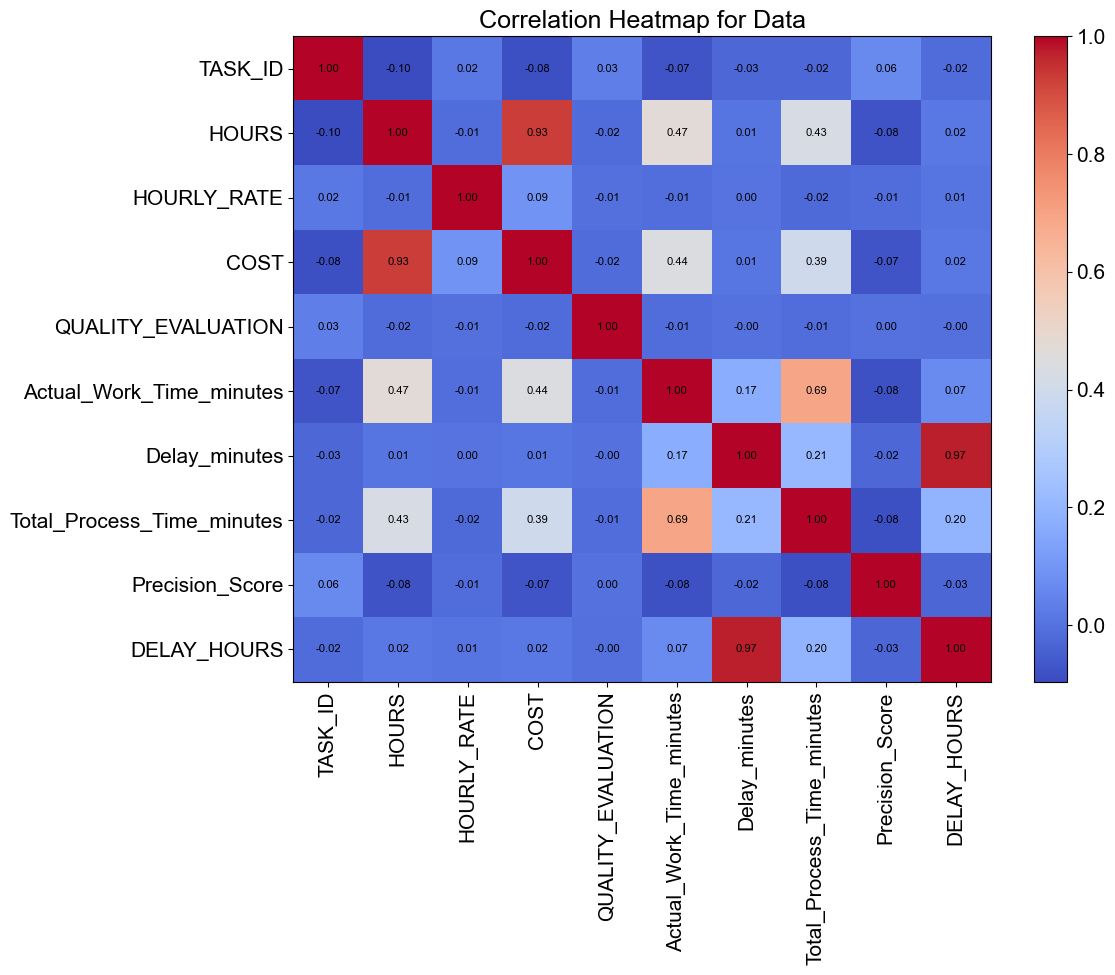

In [ ]:
# List of datasets
datasets = {
  "Data": data_df,
}

# Generate correlation heatmaps for each dataset
for name, df in datasets.items():
  # Select only numeric columns
  numeric_df = df.select_dtypes(include=[np.number])

  if numeric_df.empty:
      print(f"Skipping {name} dataset as it has no numeric columns.")
      continue

  corr_full = numeric_df.corr()

  plt.figure(figsize=(12, 10))
  plt.imshow(corr_full, cmap='coolwarm', interpolation='none', aspect='auto')
  plt.colorbar()
  plt.xticks(range(len(corr_full.columns)), corr_full.columns, rotation=90, fontsize=12)
  plt.yticks(range(len(corr_full.index)), corr_full.index, fontsize=12)
  plt.title(f"Correlation Heatmap for {name}", fontsize=12)

  # Annotate heatmap with correlation values
  for (i, j), val in np.ndenumerate(corr_full):
      plt.text(j, i, f"{val:.2f}", ha="center", va="center", color="black", fontsize=8)

  plt.tight_layout()
  plt.show()

**Feature Engineering**

In [16]:
# Function to format minutes into HH:MM format
def format_time(minutes):
    """
    Converts minutes into HH:MM format.
    Returns None for missing or negative values.
    """
    if pd.isna(minutes) or minutes is None or minutes < 0:
        return None  # Ignore invalid values
    hours = int(minutes // 60)
    mins = int(minutes % 60)
    return f"{hours:02d}:{mins:02d}"  # Formats as HH:MM

# Create new columns

# Work Duration (Actual Work Time)
if {"WORKING", "DELIVERED"}.issubset(data_df.columns):
    data_df["Actual_Work_Time_minutes"] = (data_df["DELIVERED"] - data_df["WORKING"]).dt.total_seconds() / 60
    data_df["Actual_Work_Time"] = data_df["Actual_Work_Time_minutes"].apply(format_time)

# Delay Time (Only if DELIVERED is later than END)
if {"DELIVERED", "END"}.issubset(data_df.columns):
    data_df["Delay_minutes"] = (data_df["DELIVERED"] - data_df["END"]).dt.total_seconds() / 60
    data_df["Delay_minutes"] = data_df["Delay_minutes"].apply(lambda x: x if x > 0 else None)  # Keep only positive delays
    data_df["Delay"] = data_df["Delay_minutes"].apply(format_time)

# Process Time (Total Time from Assignment to Close)
if {"ASSIGNED", "CLOSE"}.issubset(data_df.columns):
    data_df["Total_Process_Time_minutes"] = (data_df["CLOSE"] - data_df["ASSIGNED"]).dt.total_seconds() / 60
    data_df["Total_Process_Time"] = data_df["Total_Process_Time_minutes"].apply(format_time)

# Select relevant columns dynamically (only include if they exist)
cols = ["TASK_ID"]
if "Actual_Work_Time" in data_df.columns:
    cols.append("Actual_Work_Time")
if "Total_Process_Time" in data_df.columns:
    cols.append("Total_Process_Time")
if "Delay" in data_df.columns:
    cols.append("Delay")  # Include Delay only if it exists

# Display new metrics as a table along with the first few rows
print("\nUpdated Data with New Columns:")
display(data_df[cols].head())


Updated Data with New Columns:


,TASK_ID,Actual_Work_Time,Total_Process_Time,Delay
0,10048285,00:00,00:03,None
1,10048285,743:01,836:12,None
2,10048285,23:06,24:01,05:42
3,10048285,01:15,01:17,02:20
4,10048286,00:00,00:03,None


In [17]:
# Precision Score: 1/(1 + |Delay_minutes|)
if "Delay_minutes" in data_df.columns:
    data_df["Precision_Score"] = 1 / (1 + data_df["Delay_minutes"].abs())
    print("Precision_Score calculated.")
    print(data_df[["TASK_ID", "Delay_minutes", "Precision_Score"]].head())
else:
    print("Delay_minutes column is missing.")

Precision_Score calculated.
    TASK_ID  Delay_minutes  Precision_Score
0  10048285            NaN              NaN
1  10048285            NaN              NaN
2  10048285     342.350000         0.002912
3  10048285     140.116667         0.007086
4  10048286            NaN              NaN


**Task Type duration**

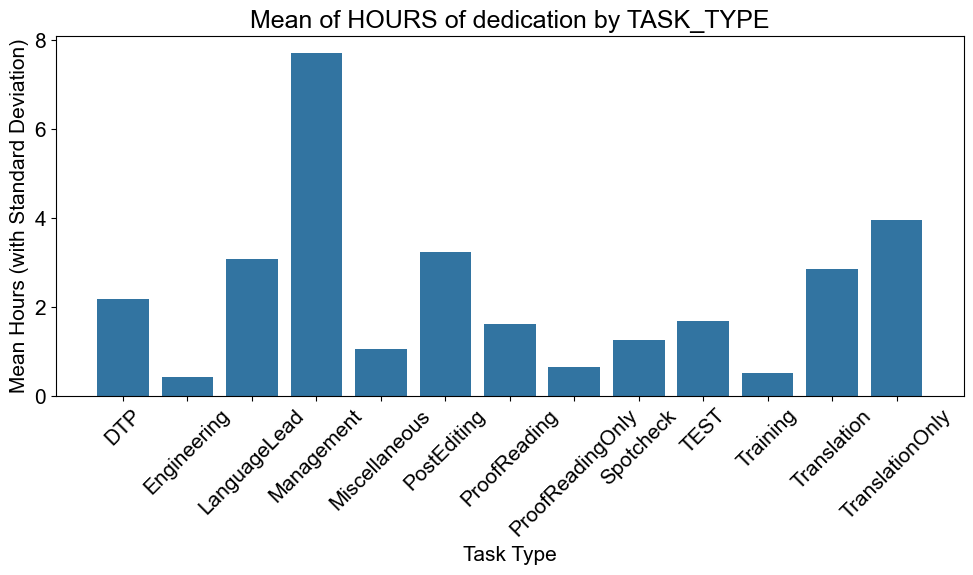

In [37]:
# Group by TASK_TYPE and calculate mean and std for the HOURS column
task_stats = data_df.groupby('TASK_TYPE')['HOURS'].agg(['mean', 'std']).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(
    x='TASK_TYPE', y='mean', data=task_stats, capsize=0.2, errorbar=None
)
plt.errorbar(
    x=range(len(task_stats['TASK_TYPE'])),
    y=task_stats['mean'],
    fmt='none',
    c='black',
    capsize=5
)

# Add labels and title
plt.title('Mean of HOURS of dedication by TASK_TYPE')
plt.xlabel('Task Type')
plt.ylabel('Mean Hours (with Standard Deviation)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
print(task_stats.to_string(index=False))

       TASK_TYPE     mean       std
             DTP 2.191270  4.604241
     Engineering 0.441329  2.258252
    LanguageLead 3.084560  8.555665
      Management 7.706153 16.621869
   Miscellaneous 1.057014  3.787579
     PostEditing 3.244260  8.580197
    ProofReading 1.622584  4.476795
ProofReadingOnly 0.651923  0.762722
       Spotcheck 1.266486  1.082721
            TEST 1.702484  1.746780
        Training 0.533000  0.126056
     Translation 2.871190  7.784560
 TranslationOnly 3.966316  8.757814


**General Experience of translators**

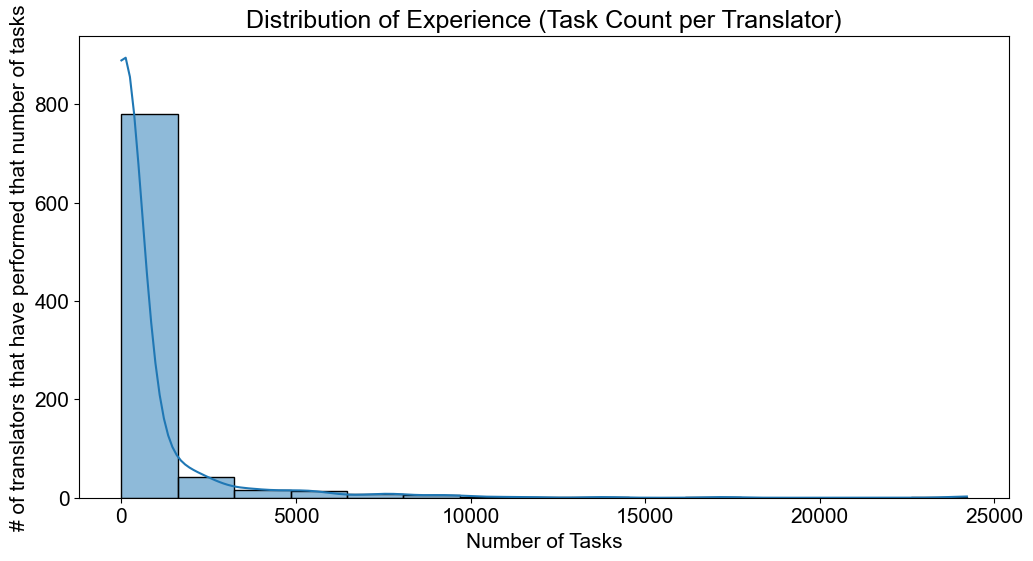

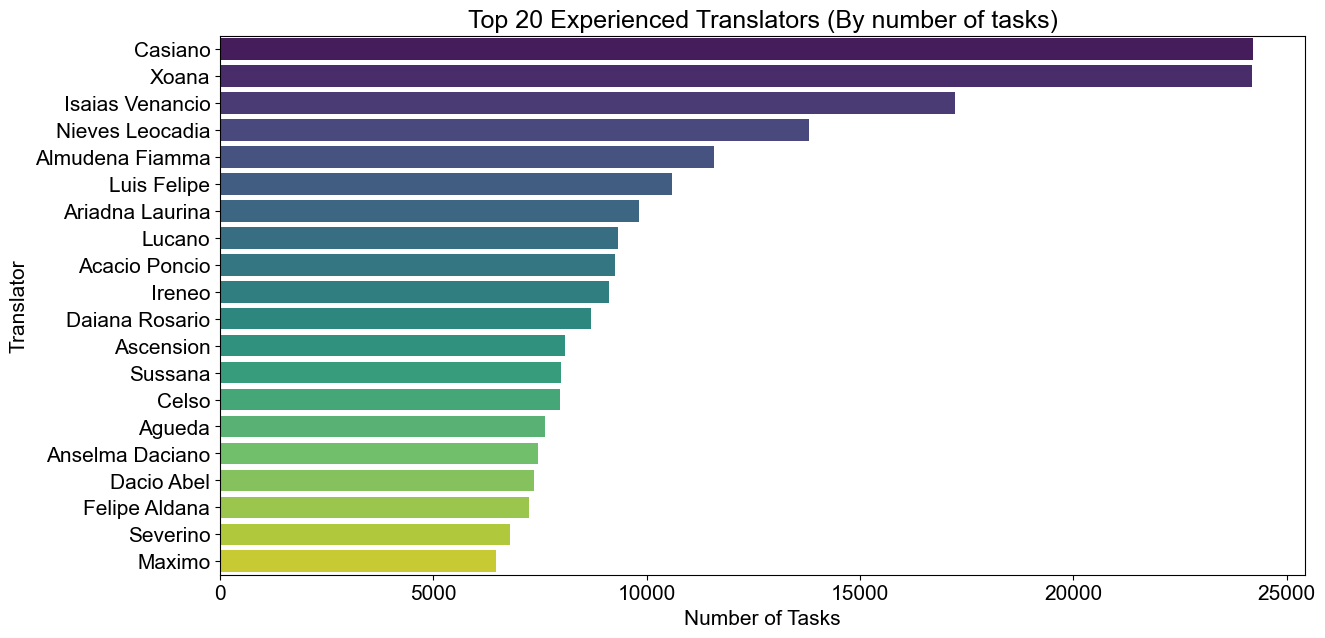

In [40]:
# Task count per translator
experience_counts = data_df.groupby('TRANSLATOR').size()

# Histogram of experience distribution
plt.figure(figsize=(12, 6))
sns.histplot(experience_counts, bins=15, kde=True)
plt.title('Distribution of Experience (Task Count per Translator)')
plt.xlabel('Number of Tasks')
plt.ylabel('# of translators that have performed that number of tasks')
plt.show()

# Bar plot of top 10 experienced translators
top_experienced = experience_counts.sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_experienced.values, y=top_experienced.index, palette='viridis', hue=top_experienced.index, legend=None)
plt.title('Top 20 Experienced Translators (By number of tasks)')
plt.xlabel('Number of Tasks')
plt.ylabel('Translator')
plt.show()


**Analysis of Task Types with Identical Source and Target Languages**

In [22]:
# Filter rows where origin language and target language are the same
same_language_rows = data_df[data_df['SOURCE_LANG'] == data_df['TARGET_LANG']]


num_same_language_rows = same_language_rows.shape[0]


print(f"Number of rows where the origin language and target language are the same: {num_same_language_rows}")
print(f"Percentage of rows where the origin language and target language are the same: {num_same_language_rows / data_df.shape[0] * 100:.2f}%")
# Display the task types for these rows
print("\nTask Types for rows where the origin language and target language are the same:")
display(same_language_rows['TASK_TYPE'].value_counts())


Number of rows where the origin language and target language are the same: 709
Percentage of rows where the origin language and target language are the same: 0.13%

Task Types for rows where the origin language and target language are the same:


TASK_TYPE
ProofReading     331
Translation      147
Miscellaneous    115
Engineering      103
PostEditing        7
DTP                6
Name: count, dtype: int64

**How often a translator was assigned the same sector and subindustry**

This code tells us versatility of translators (in how many industries each translator has worked)

In [23]:
# Check unique sectors per translator
translator_sector_counts = data_df.groupby('TRANSLATOR')['MANUFACTURER_SECTOR'].nunique()
print("\nUnique Sectors per Translator:\n", translator_sector_counts)
translators_more_than_sectors = translator_sector_counts[translator_sector_counts > 1]
print(f"\nNumber of translators with more than 1 unique sectors: {translators_more_than_sectors.shape[0]}")

# Check unique subindustry per translator
translator_subsector_counts = data_df.groupby('TRANSLATOR')['MANUFACTURER_SUBINDUSTRY'].nunique()
print("\nUnique Subindustry per Translator:\n", translator_subsector_counts)
translators_more_than_subindustries = translator_subsector_counts[translator_subsector_counts > 1]
print(f"\nNumber of translators with more than 1 unique subindustries: {translators_more_than_subindustries.shape[0]}")


Unique Sectors per Translator:
 TRANSLATOR
Aaron                  2
Abdon                  3
Abdon Isaias          13
Abdon Luis             1
Abel Irene             1
                      ..
Zacarias Casio        10
Zacarias Marcelino     7
Zachary                4
Zlatan                 4
Zlatko                 1
Name: MANUFACTURER_SECTOR, Length: 871, dtype: int64

Number of translators with more than 1 unique sectors: 618

Unique Subindustry per Translator:
 TRANSLATOR
Aaron                  2
Abdon                  4
Abdon Isaias          70
Abdon Luis             1
Abel Irene             1
                      ..
Zacarias Casio        35
Zacarias Marcelino     9
Zachary                5
Zlatan                 5
Zlatko                 1
Name: MANUFACTURER_SUBINDUSTRY, Length: 871, dtype: int64

Number of translators with more than 1 unique subindustries: 640


There is arround 200 translators that only work for one specific sector

In [24]:
# Filter translators who work for only one unique sector
translators_one_sector = translator_sector_counts[translator_sector_counts == 1]
translators_one_sector_names = translators_one_sector.index
print(f"\nTranslators working for only one sector: {translators_one_sector_names.tolist()}")

# Filter translators who work for only one unique subindustry
translators_one_subsector = translator_subsector_counts[translator_subsector_counts == 1]
translators_one_subsector_names = translators_one_subsector.index
print(f"\nTranslators working for only one subindustry: {translators_one_subsector_names.tolist()}")


Translators working for only one sector: ['Abdon Luis', 'Abel Irene', 'Abril', 'Acacio Montserrat', 'Adam', 'Adela', 'Adela Esteban', 'Adelia', 'Adrien', 'Ager', 'Agostinho', 'Agustina Greta', 'Aisha', 'Aitor', 'Alain', 'Alejandria Itzel', 'Alejandria Leon', 'Alexandru', 'Alfonso Odon', 'Alice', 'Almudena Jorge', 'Alvaro Borja', 'Amadeo Eliseo', 'Amaiur Lucano', 'Amancio', 'Amaru', 'Ana Clara', 'Ana Jimena', 'Anastasia', 'Anatolio Josue', 'Andreas', 'Andres', 'Andris', 'Anselmo', 'Anthony', 'Antton', 'Anxo', 'Aoi', 'Arami', 'Aresio Casimiro', 'Arnau', 'Arthur', 'Asier', 'Athenea', 'Augusto', 'Ava', 'Aymara', 'Balduino Agueda', 'Belen Donato', 'Beltran', 'Beltran Adrian', 'Bernarda Romualdo', 'Berta', 'Berto', 'Bianca Elissa', 'Blanca Columbano', 'Brice', 'Brigitte', 'Bruna', 'Candida Benedicto', 'Carlos Antonio', 'Carmen Maria', 'Caroline', 'Cassia', 'Catarina', 'Ceferino Virginia', 'Celine', 'Cirino', 'Ciro', 'Ciro Cesareo', 'Ciro Esiquio', 'Clara', 'Colette', 'Columba Teofanes', 'Co

This tells us how many times a Traslator has been assigned to a task of the same sector and subsector

In [25]:
# Coun how many times the combination of TRANSLATOR, MANUFACTURER_SECTOR, and MANUFACTURER_SUBINDUSTRY is repeated in the dataset
pair_counts = (
    data_df
    .groupby(['TRANSLATOR', 'MANUFACTURER_SECTOR', 'MANUFACTURER_SUBINDUSTRY'])
    .size()
    .reset_index(name='COUNT')
)

pair_counts_sorted = pair_counts.sort_values(by='COUNT', ascending=False)

# Drop rows where COUNT is less than 100
pair_counts_sorted_filtered = pair_counts_sorted[pair_counts_sorted['COUNT'] >= 1000]

# Display the filtered table
display(pair_counts_sorted_filtered)

print(f"\nNumber of unique translator-sector-subindustry combinations with more than 1000 tasks: {pair_counts_sorted_filtered.shape[0]}")

,TRANSLATOR,MANUFACTURER_SECTOR,MANUFACTURER_SUBINDUSTRY,COUNT
3235,Casiano,Communication Services,Internet Services & Infrastructure,24113
14575,Xoana,Communication Services,Internet Services & Infrastructure,14138
11220,Nieves Leocadia,Communication Services,Internet Services & Infrastructure,12551
7418,Isaias Venancio,Communication Services,Internet Services & Infrastructure,10425
2116,Ariadna Laurina,Information Technology,"Technology Hardware, Storage & Peripherals",7825
...,...,...,...,...
8712,Laureano Facundo,Health Care,Health Care Equipment,1118
6482,Gala,Information Technology,Systems Software,1048
1183,Amaro,Communication Services,Internet Services & Infrastructure,1009
13154,Salma Benedicto,Information Technology,Application Software,1004



Number of unique translator-sector-subindustry combinations with more than 1000 tasks: 81


**How often a translator was assigned the same client**

In [26]:
# Coun how many times the combination of TRANSLATOR, MANUFACTURER (Client) is repeated in the dataset
pair_counts = (
    data_df
    .groupby(['TRANSLATOR', 'MANUFACTURER'])
    .size()
    .reset_index(name='COUNT')
)

pair_counts_sorted = pair_counts.sort_values(by='COUNT', ascending=False)

# Drop rows where COUNT is less than 1000
pair_counts_sorted_filtered = pair_counts_sorted[pair_counts_sorted['COUNT'] >= 1000]

# Display the filtered table
display(pair_counts_sorted_filtered)

print(f"\nNumber of unique translator-sector-subindustry combinations with more than 1000 tasks: {pair_counts_sorted_filtered.shape[0]}")

,TRANSLATOR,MANUFACTURER,COUNT
5786,Casiano,TrueConnect,24113
25605,Xoana,TrueConnect,14138
19396,Nieves Leocadia,TrueConnect,12551
12686,Isaias Venancio,TrueConnect,10425
3672,Ariadna Laurina,FrontierTech,7745
...,...,...,...
17512,Maria Aurora,AeroSysTech,1147
22684,Salma Benedicto,DesarrolloYa,1074
11056,Gala,AeroSysTech,1048
22538,Salma,FrontierTech,1027



Number of unique translator-sector-subindustry combinations with more than 1000 tasks: 71


**Multitasking**

Translators that do multitasking

In [27]:
df_multitask = data_df[['TRANSLATOR', 'TASK_ID', 'WORKING', 'DELIVERED']]

df_multitask = df_multitask.sort_values(by=['TRANSLATOR', 'WORKING'])


from collections import defaultdict, Counter

# Initialize a dictionary to count overlaps for each translator
overlap_count = defaultdict(int)

for translator, group in df_multitask.groupby('TRANSLATOR'):
    end_prev = pd.Timestamp.min
    for _, row in group.iterrows():
        start = row['WORKING']
        end = row['DELIVERED']
        if start < end_prev:
            overlap_count[translator] += 1
        end_prev = max(end_prev, end)

multitasking_df = pd.DataFrame(list(overlap_count.items()), columns=['TRANSLATOR', 'OVERLAPPING_TASKS'])
multitasking_df = multitasking_df.sort_values(by='OVERLAPPING_TASKS', ascending=False)

display(multitasking_df.head(10))

,TRANSLATOR,OVERLAPPING_TASKS
566,Xoana,23699
147,Casiano,19251
456,Nieves Leocadia,10299
90,Ariadna Laurina,8198
7,Acacio Poncio,7931
39,Almudena Fiamma,7707
306,Isaias Venancio,7614
240,Felipe Aldana,6750
528,Severino,6130
429,Maximo,5025


 Which task types overlap most often

In [28]:
task_overlap = Counter()

for translator, group in data_df.groupby('TRANSLATOR'):
    end_prev = pd.Timestamp.min
    task_prev = None
    for _, row in group.iterrows():
        start, end = row['WORKING'], row['DELIVERED']
        task_type = row['TASK_TYPE']
        if pd.notnull(start) and pd.notnull(end):
            if start < end_prev:
                task_overlap[task_type] += 1
            end_prev = max(end_prev, end)

task_overlap_df = pd.DataFrame(task_overlap.items(), columns=['TASK_TYPE', 'OVERLAPS']).sort_values(by='OVERLAPS', ascending=False)

display(task_overlap_df.head(10))

,TASK_TYPE,OVERLAPS
0,Translation,214507
2,ProofReading,125910
3,Miscellaneous,44634
1,PostEditing,35368
7,Engineering,2098
8,LanguageLead,1395
4,Management,508
6,DTP,406
5,TEST,97
10,Spotcheck,30


Correlate multitasking with experience, delay, and quality

In [29]:
# Experience: total number of tasks per translator
experience = data_df.groupby('TRANSLATOR').size().rename('TASK_COUNT')

# Delay: CLOSE - END (theoretical end)
data_df['DELAY_HOURS'] = (pd.to_datetime(data_df['CLOSE']) - pd.to_datetime(data_df['END'])).dt.total_seconds() / 3600

avg_delay = data_df.groupby('TRANSLATOR')['DELAY_HOURS'].mean().rename('AVG_DELAY_HOURS')
avg_quality = data_df.groupby('TRANSLATOR')['QUALITY_EVALUATION'].mean().rename('AVG_QUALITY')

# Merge everything
correlation_df = multitasking_df.set_index('TRANSLATOR') \
    .join([experience, avg_delay, avg_quality])

correlation_df = correlation_df.fillna(0)
display(correlation_df.corr())

,OVERLAPPING_TASKS,TASK_COUNT,AVG_DELAY_HOURS,AVG_QUALITY
OVERLAPPING_TASKS,1.000000,0.949417,-0.070394,0.024792
TASK_COUNT,0.949417,1.000000,-0.086240,0.034401
AVG_DELAY_HOURS,-0.070394,-0.086240,1.000000,-0.053060
AVG_QUALITY,0.024792,0.034401,-0.053060,1.000000


**Experience by Sector**

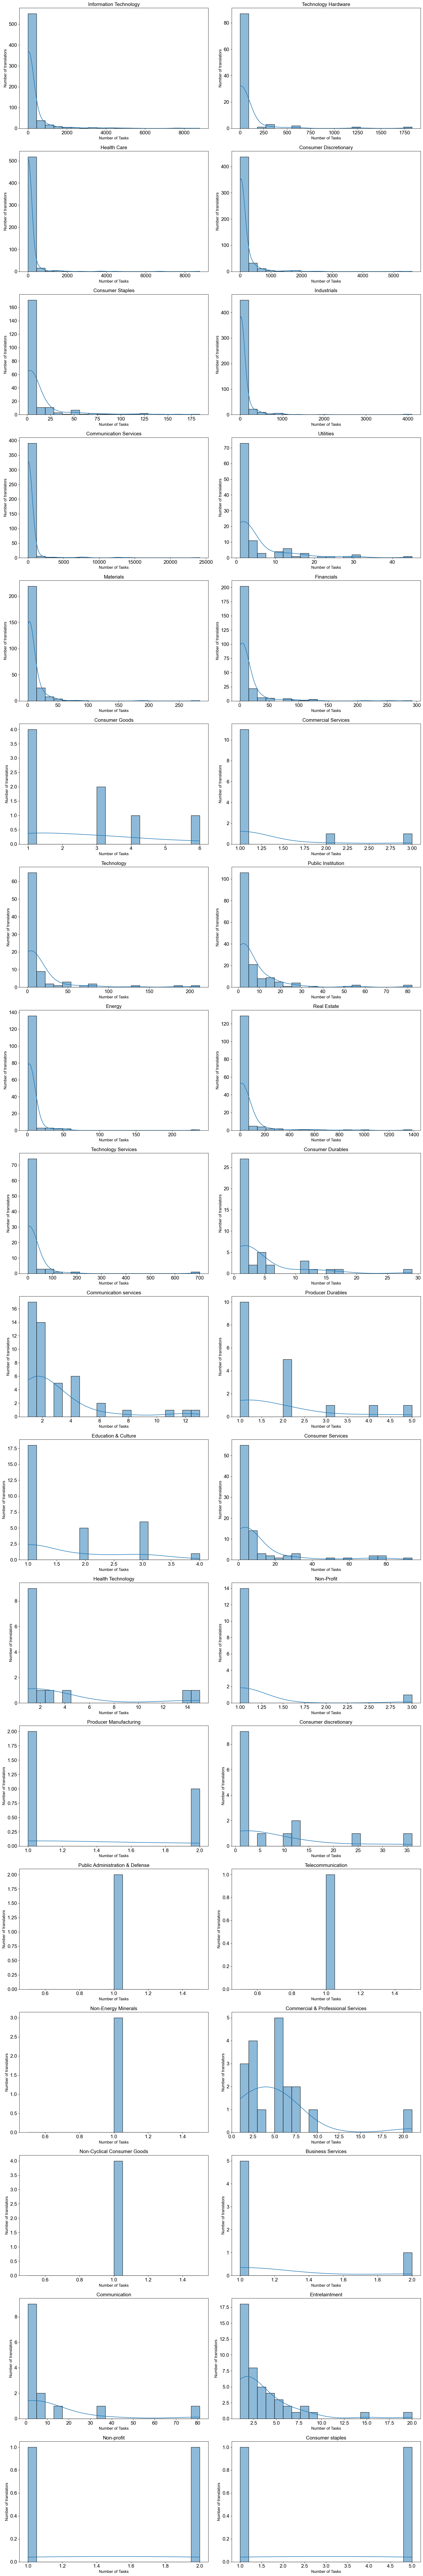

In [60]:
sector_cols = data_df['MANUFACTURER_SECTOR'].unique()
sector_cols = [col for col in sector_cols if pd.notnull(col)]  # Remove NaN values
# Set up the figure with a grid layout
fig, axes = plt.subplots(18, 2, figsize=(18, 3 * len(sector_cols)))
# Flatten the axes array to easily index it
axes = axes.flatten()

# Loop through each task type and plot the histogram in the appropriate subplot
for i, task_type in enumerate(sector_cols):
    # Filter data for the current task type
    sector_data = data_df[data_df['MANUFACTURER_SECTOR'] == task_type]
    
    # Get the task counts per translator for this task type
    experience_counts = sector_data.groupby('TRANSLATOR').size()

    sns.histplot(experience_counts, bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'{task_type}', fontsize=15)
    axes[i].set_xlabel('Number of Tasks', fontsize=12)
    axes[i].set_ylabel('Number of translators', fontsize=12)

for j in range(len(sector_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Experience by Task Type**

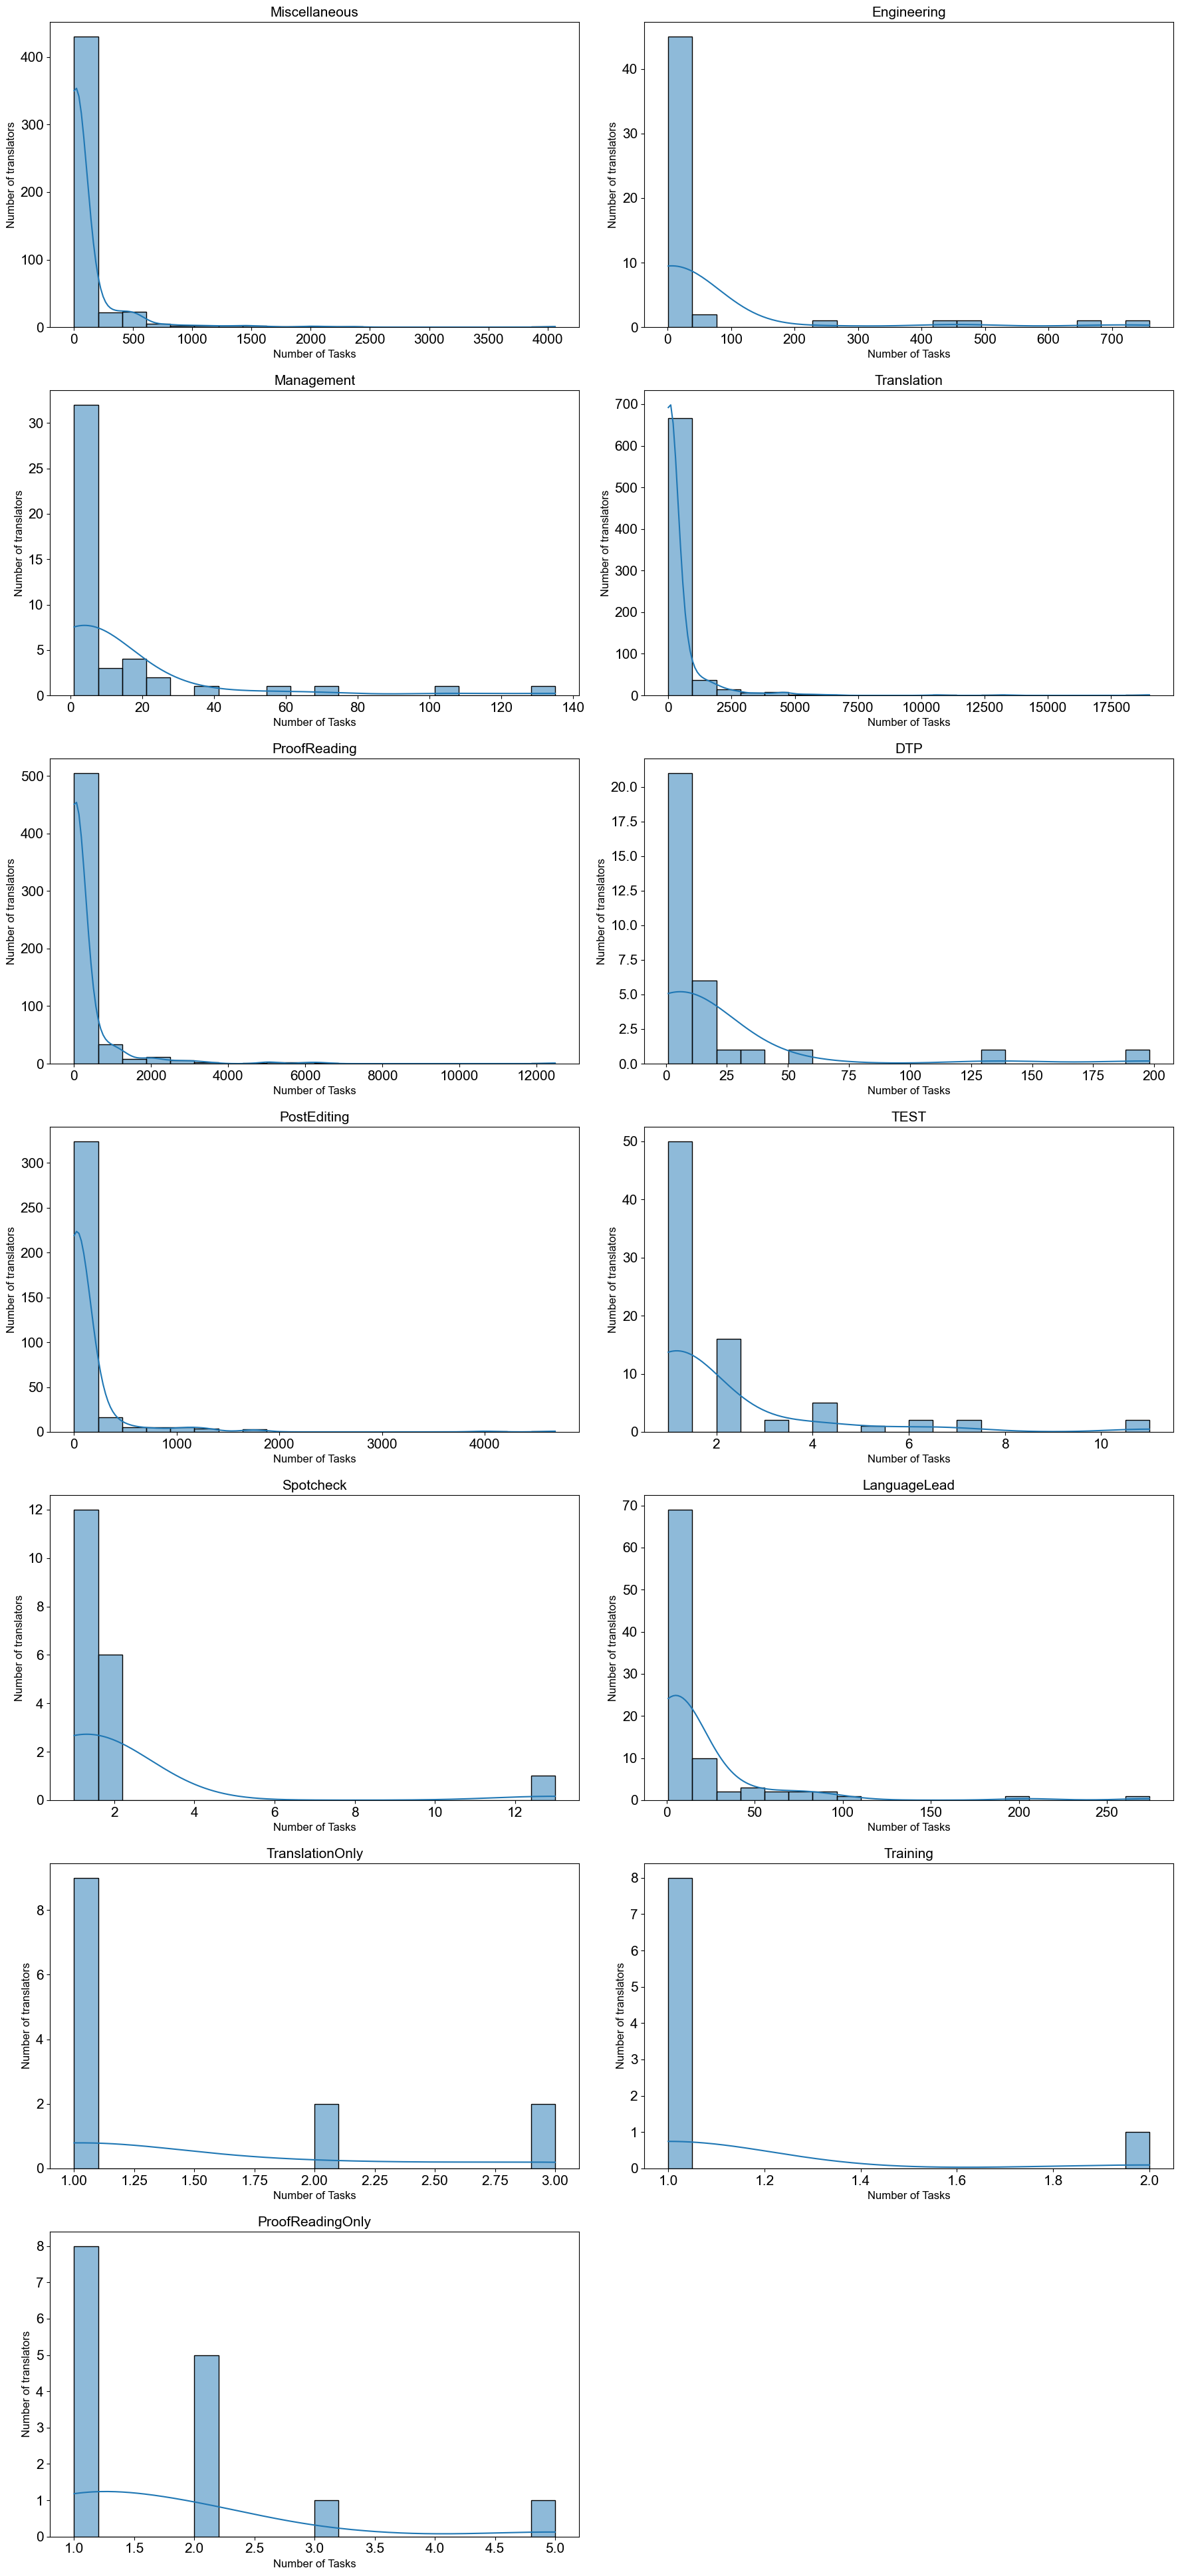

In [53]:
task_types = data_df['TASK_TYPE'].unique()

# Set up the figure with a grid layout
fig, axes = plt.subplots(7, 2, figsize=(18, 3 * len(task_types)))
# Flatten the axes array to easily index it
axes = axes.flatten()

# Loop through each task type and plot the histogram in the appropriate subplot
for i, task_type in enumerate(task_types):
    # Filter data for the current task type
    task_data = data_df[data_df['TASK_TYPE'] == task_type]
    
    # Get the task counts per translator for this task type
    experience_counts = task_data.groupby('TRANSLATOR').size()

    sns.histplot(experience_counts, bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'{task_type}', fontsize=15)
    axes[i].set_xlabel('Number of Tasks', fontsize=12)
    axes[i].set_ylabel('Number of translators', fontsize=12)

for j in range(len(task_types), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()